###**THEORETICAL**

**Q1. What is a Decision Tree, and how does it work?**

**Ans:** A Decision Tree is a popular machine learning algorithm used for classification and regression tasks. It works like a flowchart, where each internal node represents a decision based on a specific feature, branches represent possible outcomes, and leaf nodes represent final predictions or classifications.

### **How It Works**
1. **Splitting the Data** – The algorithm selects the best feature to split the dataset based on a criterion like **Gini impurity** or **entropy** (for classification) and **Mean Squared Error (MSE)** (for regression).
2. **Recursive Partitioning** – The dataset is divided into subsets based on the selected feature, and the process continues recursively, forming a tree structure.
3. **Stopping Criteria** – The tree stops growing when a predefined condition is met (e.g., maximum depth reached, minimum number of samples per node, or when further splitting does not improve the model).
4. **Prediction** – When making a prediction, the input follows the tree's paths from the root to a leaf node, determining the final decision.

### **Advantages**
- Easy to interpret and visualize.
- Handles both numerical and categorical data.
- Requires minimal data preprocessing.

### **Disadvantages**
- Prone to overfitting, especially with deep trees.
- Sensitive to noisy data.



**Q2. What are impurity measures in Decision Trees?**

**Ans:** In Decision Trees, **impurity measures** are metrics used to determine how "mixed" or "impure" a node is in terms of the class labels of the samples it contains. They guide the **splitting process** of the tree—helping decide which feature and threshold to use at each step to best separate the classes.

The goal is to **reduce impurity** with each split, ideally ending up with pure (or nearly pure) nodes that contain samples of only one class.

### Common Impurity Measures:

#### 1. **Gini Impurity**

* **Formula:**

  $$
  Gini = 1 - \sum_{i=1}^{C} p_i^2
  $$

  where $p_i$ is the proportion of instances of class $i$ in the node, and $C$ is the number of classes.

* **Range:** 0 (pure) to \~0.5 (most impure in binary classification)

* **Used in:** CART (Classification and Regression Trees)

#### 2. **Entropy (Information Gain)**

* **Formula:**

  $$
  Entropy = -\sum_{i=1}^{C} p_i \log_2(p_i)
  $$

* **Information Gain** is the decrease in entropy after a split.

  $$
  IG = Entropy(parent) - \text{Weighted Average of Entropy(children)}
  $$

* **Range:** 0 (pure) to 1 (most impure in binary classification)

* **Used in:** ID3, C4.5 algorithms

#### 3. **Classification Error (Misclassification Rate)**

* **Formula:**

  $$
  Error = 1 - \max(p_i)
  $$

  where $\max(p_i)$ is the proportion of the majority class in the node.

* **Range:** 0 (pure) to 0.5 (impure in binary classification)

* **Less sensitive** to changes in node class distribution, so less often used for splits but sometimes used for pruning.

---

### Summary Comparison

| Measure              | Sensitive to Class Distribution? | Used For Splitting? |
| -------------------- | -------------------------------- | ------------------- |
| Gini Impurity        | Yes                              | Yes                 |
| Entropy              | Yes                              | Yes                 |
| Classification Error | Less so                          | Rarely              |

Each measure quantifies impurity differently, but the general principle is the same: choose splits that **reduce impurity** the most.


**Q3. What is the mathematical formula for Gini Impurity?**

**Ans:** The **mathematical formula for Gini Impurity** at a node is:

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

### Where:

* $C$ is the number of classes,
* $p_i$ is the proportion (probability) of samples belonging to class $i$ at that node.

---

### Example (Binary Classification):

If a node contains:

* 4 samples of class A
* 6 samples of class B

Then:

* $p_A = \frac{4}{10} = 0.4$
* $p_B = \frac{6}{10} = 0.6$

$$
Gini = 1 - (0.4^2 + 0.6^2) = 1 - (0.16 + 0.36) = 1 - 0.52 = 0.48
$$

A **Gini Impurity of 0** means the node is **pure** (only one class is present). The closer it is to 0, the better the split.


**Q4. What is the mathematical formula for Entropy?**

**Ans**: The **mathematical formula for Entropy** at a node (used in Decision Trees) is:

$$
Entropy = -\sum_{i=1}^{C} p_i \log_2(p_i)
$$

### Where:

* $C$ is the number of classes,
* $p_i$ is the proportion (probability) of samples belonging to class $i$ at that node,
* The logarithm is base 2 (to measure entropy in bits).

---

### Important Notes:

* If $p_i = 0$ for any class, the term $p_i \log_2(p_i)$ is defined as 0 (since $\lim_{p \to 0} p \log_2(p) = 0$).
* **Entropy = 0** when the node is pure (i.e., all samples belong to one class).
* The **maximum entropy** occurs when the classes are equally likely.

---

### Example (Binary Classification):

If a node has:

* 50% class A → $p_A = 0.5$
* 50% class B → $p_B = 0.5$

Then:

$$
Entropy = -(0.5 \log_2 0.5 + 0.5 \log_2 0.5) = -2 \times 0.5 \times (-1) = 1
$$

This represents the **maximum entropy** for a binary classification, indicating maximum impurity (complete uncertainty).


**Q5 What is Information Gain, and how is it used in Decision Trees?**

**Ans:** **Information Gain (IG)** is a metric used in **Decision Trees** to quantify the **reduction in entropy (uncertainty or impurity)** achieved by splitting a dataset based on a particular feature.

It helps in selecting the **best feature to split** the data at each node in the tree.

---

### 🔢 **Mathematical Definition**

$$
\text{Information Gain} = Entropy(\text{parent}) - \sum_{k=1}^{K} \frac{N_k}{N} \cdot Entropy(\text{child}_k)
$$

### Where:

* $Entropy(\text{parent})$: Entropy before the split.
* $K$: Number of child nodes after the split.
* $N$: Total number of samples in the parent node.
* $N_k$: Number of samples in child node $k$.
* $Entropy(\text{child}_k)$: Entropy of child node $k$.

---

### ✅ **How It’s Used in Decision Trees:**

1. For each feature, try all possible splits.
2. For each split, compute the **Information Gain**.
3. Select the **split with the highest Information Gain**.
4. Repeat recursively on resulting child nodes.

This process continues until a stopping condition is met (e.g., pure nodes, max depth, minimum samples).

---

### 📌 Example:

Suppose a parent node has:

* 10 samples: 5 of class A and 5 of class B
* $Entropy = 1$ (maximum uncertainty)

You split into:

* Left node: 4 of class A, 1 of class B → $Entropy \approx 0.72$
* Right node: 1 of class A, 4 of class B → $Entropy \approx 0.72$

Weighted child entropy:

$$
\frac{5}{10} \cdot 0.72 + \frac{5}{10} \cdot 0.72 = 0.72
$$

Information Gain:

$$
1 - 0.72 = 0.28
$$

This means the split **reduces uncertainty** by 0.28.

---

### 📘 Summary:

* **Information Gain** helps build decision trees by choosing the most informative splits.
* It is based on **Entropy**, so it's commonly used in algorithms like **ID3** and **C4.5**.
* A higher Information Gain means a **more effective split**.


**Q6. What is the difference between Gini Impurity and Entropy?**

**Ans:** The **main difference between Gini Impurity and Entropy** lies in how they measure the impurity of a node in a Decision Tree and how they respond to class distributions. Both are used to decide the best feature for splitting the data, but they have **different formulas and properties**.

---

### 🔢 **1. Mathematical Formulas**

**Gini Impurity:**

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

**Entropy:**

$$
Entropy = -\sum_{i=1}^{C} p_i \log_2(p_i)
$$

Where:

* $C$ is the number of classes,
* $p_i$ is the proportion of class $i$ at the node.

---

### ⚖️ **2. Range of Values**

| Measure       | Minimum (Pure Node) | Maximum (Binary Classes) |
| ------------- | ------------------- | ------------------------ |
| Gini Impurity | 0                   | 0.5                      |
| Entropy       | 0                   | 1                        |

---

### 📊 **3. Sensitivity to Class Distribution**

* **Entropy** is **more sensitive** to changes in class probabilities, especially when the classes are closer in frequency.
* **Gini Impurity** tends to be **less sensitive**, often favoring the most frequent class more strongly.

---

### 🧠 **4. Interpretation**

* **Entropy** comes from information theory and measures the amount of **information (or surprise)** in a distribution.
* **Gini** is more of a **probability-based measure**, representing the chance of incorrect classification.

---

### 🧪 **5. Practical Differences**

| Aspect                   | Gini Impurity         | Entropy                |
| ------------------------ | --------------------- | ---------------------- |
| Faster to compute        | ✅ Yes (no logs)       | ❌ No (uses log base 2) |
| Used in                  | CART algorithm        | ID3, C4.5 algorithms   |
| Bias toward larger class | Slightly higher       | More balanced          |
| Typical performance      | Similar in most cases | Similar in most cases  |

---

### ✅ **Summary**

| Feature     | Gini Impurity    | Entropy                         |
| ----------- | ---------------- | ------------------------------- |
| Formula     | $1 - \sum p_i^2$ | $-\sum p_i \log_2 p_i$          |
| Used In     | CART             | ID3, C4.5                       |
| Computation | Faster           | Slightly slower (uses log)      |
| Sensitivity | Less sensitive   | More sensitive to class balance |

Both are valid and often yield **similar trees** in practice, but Gini is commonly preferred in performance-critical applications like **scikit-learn**'s implementation of CART.


**Q7. What is the mathematical explanation behind Decision Trees?**

**Ans:** The **mathematical explanation behind Decision Trees** is grounded in **recursive partitioning of the feature space** to reduce a measure of impurity (e.g., Gini, Entropy, or variance for regression). Here's a breakdown of how Decision Trees work mathematically:

---

## 🔢 1. **Dataset and Problem Setup**

Let the training data be:

$$
D = \{(x^{(i)}, y^{(i)})\}_{i=1}^{N}
$$

* $x^{(i)} \in \mathbb{R}^d$: Feature vector of the $i$-th sample.
* $y^{(i)}$: Target value (class label for classification or numeric value for regression).

The goal is to partition the data **recursively** into subsets that are as **pure** as possible.

---

## 🔁 2. **Recursive Splitting**

At each node:

* Consider all features $x_j$ and possible split points $s$.
* For each candidate split, partition $D$ into:

  * $D_{\text{left}} = \{x \in D \mid x_j \le s\}$
  * $D_{\text{right}} = \{x \in D \mid x_j > s\}$

Compute the **impurity before and after** the split.

---

## 📉 3. **Impurity Measures**

### For **classification**, typical impurity measures:

* **Gini Impurity:**

  $$
  Gini(D) = 1 - \sum_{k=1}^{C} p_k^2
  $$
* **Entropy:**

  $$
  Entropy(D) = -\sum_{k=1}^{C} p_k \log_2(p_k)
  $$

Where $p_k$ is the proportion of class $k$ in node $D$.

### For **regression**, use **variance** or **mean squared error**:

$$
Var(D) = \frac{1}{|D|} \sum_{i=1}^{|D|} (y^{(i)} - \bar{y})^2
$$

---

## ➕ 4. **Split Evaluation**

For a candidate split:

$$
\text{Impurity}_{\text{split}} = \frac{|D_{\text{left}}|}{|D|} \cdot I(D_{\text{left}}) + \frac{|D_{\text{right}}|}{|D|} \cdot I(D_{\text{right}})
$$

Where $I(\cdot)$ is the impurity function (e.g., Gini, Entropy).

### Choose the split that **minimizes** this weighted impurity:

$$
\text{Best split} = \arg\min_{j,s} \text{Impurity}_{\text{split}}(j, s)
$$

---

## 🌳 5. **Tree Construction Algorithm (Simplified)**

1. Start with all data at the root node.
2. For each node:

   * If the node is pure or stopping criteria is met (e.g., depth, min samples), stop.
   * Else, find the best split by minimizing impurity.
   * Partition the data and repeat recursively on child nodes.
3. Assign a prediction to each **leaf node**:

   * Classification: majority class.
   * Regression: average target value.

---

## 📘 Summary (Mathematical Workflow)

| Step                   | Mathematics                           |
| ---------------------- | ------------------------------------- |
| Candidate splits       | $(x_j \le s)$                         |
| Impurity calculation   | Gini, Entropy, or Variance            |
| Split evaluation       | Weighted impurity after split         |
| Optimization objective | $\min \text{Impurity}_{\text{split}}$ |
| Recursion              | Repeat until stopping condition       |

---

This process forms a **piecewise decision function** over the input space that segments it into regions with similar target values or labels.


**Q8. What is Pre-Pruning in Decision Tree?**

**Ans:** **Pre-pruning** (also known as **early stopping**) is a technique used in **Decision Trees** to **halt the tree growth early**, before it becomes overly complex and overfits the training data.

---

## 🌱 **What is Pre-Pruning?**

In pre-pruning, the algorithm **stops splitting a node during tree construction** if certain conditions are met, **even if the node is not pure**.

---

## 🧠 **Why Pre-Pruning?**

* To **prevent overfitting** by controlling the tree's size and complexity.
* To improve **generalization** on unseen data.
* To **reduce training time** and computational cost.

---

## ⚙️ **Common Pre-Pruning Criteria**

The tree stops growing when any of these conditions are met:

| Criterion                              | Description                                                                                                              |
| -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **Max Depth**                          | Limit the maximum depth of the tree.                                                                                     |
| **Min Samples per Node**               | Stop splitting if a node has fewer than a specified number of samples (e.g., `min_samples_split` or `min_samples_leaf`). |
| **Max Number of Nodes**                | Set a limit on the total number of nodes in the tree.                                                                    |
| **Minimum Information Gain**           | Stop if the best split doesn't reduce impurity enough (e.g., `min_impurity_decrease`).                                   |
| **Max Features**                       | Restrict the number of features to consider at each split.                                                               |
| **Chi-squared test (in ID3 variants)** | Stop if a statistical test shows no significant gain.                                                                    |

---

## 📌 **Example (Min Samples Split)**

If you set:

```python
min_samples_split = 10
```

Then the tree will **not split** a node if it has **fewer than 10 samples**, even if the split would improve purity.

---

## 🔄 **Pre-Pruning vs Post-Pruning**

| Aspect       | Pre-Pruning                       | Post-Pruning                    |
| ------------ | --------------------------------- | ------------------------------- |
| When applied | During tree construction          | After full tree is built        |
| Purpose      | Prevent overfitting early         | Simplify a fully grown tree     |
| Risk         | May stop too early (underfitting) | May be more accurate but slower |

---

## ✅ Summary

**Pre-Pruning** is an efficient strategy to **limit tree growth during training** using predefined constraints (like depth or sample count). It strikes a balance between model complexity and performance, helping avoid overfitting and improving generalization.


**Q9. What is Post-Pruning in Decision Trees?**

**Ans:** **Post-pruning** (also known as **cost-complexity pruning** or **error-based pruning**) is a technique used in **Decision Trees** to simplify a **fully grown tree** by **removing branches that have little importance**, aiming to improve generalization and reduce overfitting.

---

## 🌳 What Is Post-Pruning?

* After growing a **complete tree** (often to pure leaves or maximum allowed size), post-pruning **examines each subtree** from the bottom up.
* It **replaces subtrees with leaf nodes** if doing so **improves or maintains prediction accuracy** on a validation set or based on a complexity penalty.

---

## 📉 Why Use Post-Pruning?

* Fully grown trees tend to **overfit** by modeling noise or outliers.
* Post-pruning helps create a **simpler, more robust model** that performs better on unseen data.

---

## 🔢 Common Post-Pruning Methods

### 1. **Reduced Error Pruning**

* Evaluate the tree on a **validation set**.
* For each non-leaf node, consider **replacing it with a leaf** (majority class).
* Keep the change **if it doesn't increase error** on the validation set.
* Repeat recursively.

### 2. **Cost-Complexity Pruning (used in CART)**

* Introduce a **penalty term** for tree complexity:

  $$
  R_\alpha(T) = R(T) + \alpha \cdot |T|
  $$

  * $R(T)$: Error rate (e.g., misclassification or MSE).
  * $|T|$: Number of leaves (complexity).
  * $\alpha$: Complexity parameter.
* Prune subtrees to minimize $R_\alpha(T)$.
* This produces a **sequence of simpler trees**, and cross-validation is used to choose the best one.

---

## 🔄 Pre-Pruning vs Post-Pruning

| Feature      | Pre-Pruning                         | Post-Pruning                     |
| ------------ | ----------------------------------- | -------------------------------- |
| When applied | During tree building                | After tree is fully built        |
| Risk         | May stop too early (underfitting)   | Can overfit first, then correct  |
| Evaluation   | Uses fixed thresholds (e.g., depth) | Uses validation or penalty score |
| Flexibility  | Less flexible                       | More flexible                    |

---

## ✅ Summary

**Post-pruning** simplifies an overfitted decision tree **after it's fully grown** by removing branches that do not improve generalization. It is a powerful method to reduce model complexity while preserving or improving predictive accuracy. It's widely used in algorithms like **CART** and provides a **more data-driven, systematic approach** than pre-pruning.


**Q10. What is the difference between Pre-Pruning and Post-Pruning?**

**Ans:** The difference between **Pre-Pruning** and **Post-Pruning** in Decision Trees lies in **when** and **how** the tree is simplified to avoid overfitting.

---

## 🔄 **Pre-Pruning vs Post-Pruning: Side-by-Side Comparison**

| Feature                | **Pre-Pruning** (Early Stopping)                          | **Post-Pruning** (Simplification after Full Growth)           |
| ---------------------- | --------------------------------------------------------- | ------------------------------------------------------------- |
| **When applied**       | During tree construction                                  | After the full tree is built                                  |
| **Stopping criterion** | Uses predefined thresholds (e.g., max depth, min samples) | Evaluates performance on validation set or complexity penalty |
| **Risk**               | Can **underfit** by stopping too early                    | Can **overfit first**, then correct by pruning                |
| **Flexibility**        | Less flexible (hard-coded constraints)                    | More flexible (evaluates real tree performance)               |
| **Evaluation method**  | Heuristic thresholds                                      | Empirical evaluation or cost-complexity pruning               |
| **Efficiency**         | Faster, since it avoids building full tree                | Slower, builds full tree first, then prunes                   |
| **Used in**            | Often in fast, large-scale systems                        | Common in algorithms like CART, C4.5                          |

---

## 🧠 **Analogy**

* **Pre-Pruning** is like **stopping a sculptor early** before they finish the statue.
* **Post-Pruning** is like **finishing the statue fully, then chipping away unnecessary details**.

---

## ✅ **Summary**

| Term     | Pre-Pruning               | Post-Pruning                         |
| -------- | ------------------------- | ------------------------------------ |
| Goal     | Prevent overfitting early | Remove overfitting after full growth |
| Strength | Simple, fast              | Data-driven, effective               |
| Weakness | May underfit              | May be computationally heavier       |

In practice, **post-pruning is often more accurate** but **pre-pruning is faster** and easier to control. Some tree algorithms (like `CART` in scikit-learn) support both via parameters like `max_depth` (pre-pruning) and `ccp_alpha` (post-pruning).


**Q11. What is a Decision Tree Regressor?**

**Ans:** A **Decision Tree Regressor** is a type of decision tree used for **regression tasks**, where the goal is to **predict a continuous (numeric) value** rather than a class label.

---

## 🌳 **What Is a Decision Tree Regressor?**

It builds a **tree structure** that recursively splits the input space into regions, and at each **leaf node**, it outputs a **numeric prediction**, typically the **mean** of the target values in that region.

---

## 🔢 **How It Works (Mathematically)**

At each split:

* Choose the feature $x_j$ and threshold $s$ that minimizes the **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y})^2
$$

* For a split:

  * Left node: $x_j \leq s$
  * Right node: $x_j > s$

The split is chosen to minimize the **weighted average MSE** of the child nodes:

$$
\text{Split MSE} = \frac{N_L}{N} \cdot MSE_L + \frac{N_R}{N} \cdot MSE_R
$$

Where:

* $N_L, N_R$: Number of samples in left and right nodes.
* $MSE_L, MSE_R$: MSE in each child.

---

## ✅ **Prediction Rule**

Once the tree is trained:

* For a new input $x$, follow the decision rules down the tree.
* The prediction is the **mean target value** of the samples in the reached leaf.

---

## 📌 **Key Features**

| Feature                 | Description                            |
| ----------------------- | -------------------------------------- |
| **Output**              | Continuous value (e.g., price, age)    |
| **Splitting criterion** | Minimizes variance or MSE              |
| **Prediction**          | Mean of values in a leaf node          |
| **Non-linear**          | Can model complex, non-linear patterns |
| **Interpretability**    | Easy to visualize and interpret        |

---

## 🧠 **Example**

Predicting house prices based on features like:

* Size
* Location
* Number of bedrooms

The tree will partition the data into regions (e.g., houses with size > 1500 sqft and location = urban) and assign each region an average price based on training data.

---

## 🧪 **In Code (scikit-learn)**

```python
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
```

---

## 📘 Summary

A **Decision Tree Regressor** is a tree-based model that predicts **continuous values** by **recursively partitioning** the input space and averaging the outcomes in each region. It's intuitive, handles non-linearity well, and forms the basis for powerful ensemble methods like **Random Forests** and **Gradient Boosting Machines (GBMs)**.


**Q12. What are the advantages and disadvantages of Decision Trees?**

**Ans:** Here’s a comprehensive overview of the **advantages and disadvantages** of **Decision Trees**:

---

## ✅ **Advantages of Decision Trees**

| Advantage                      | Description                                                                  |
| ------------------------------ | ---------------------------------------------------------------------------- |
| **Easy to understand**         | Intuitive model; can be visualized as a flowchart/tree structure.            |
| **No feature scaling needed**  | No need to normalize or standardize data (unlike SVM, KNN, etc.).            |
| **Handles both types of data** | Can handle numerical and categorical features.                               |
| **Non-linear relationships**   | Can model complex, non-linear patterns without transformation.               |
| **Feature selection built-in** | Automatically selects important features by splitting.                       |
| **Little data preparation**    | Doesn’t require dummy encoding (for tree algorithms that handle categories). |
| **Fast to train and predict**  | Especially with small to medium datasets.                                    |
| **Can handle missing values**  | Some implementations can work with incomplete data.                          |

---

## ❌ **Disadvantages of Decision Trees**

| Disadvantage                         | Description                                                                        |
| ------------------------------------ | ---------------------------------------------------------------------------------- |
| **Overfitting**                      | Prone to creating overly complex trees that fit noise in the training data.        |
| **Unstable**                         | Small changes in data can lead to different trees (high variance).                 |
| **Biased splits**                    | Can favor features with more levels (especially with categorical features).        |
| **Greedy splitting**                 | Uses a local, greedy strategy at each node—may miss globally optimal trees.        |
| **Poor generalization (deep trees)** | Deep trees may generalize poorly unless pruned.                                    |
| **Not smooth**                       | Creates piecewise constant approximations (no smooth curves).                      |
| **Limited extrapolation**            | Doesn’t predict well beyond the range of training data (especially in regression). |

---

## 🧠 **When to Use Decision Trees**

* When interpretability and **visual explanation** are important.
* As a **baseline model** before trying more complex methods.
* In **ensembles** like Random Forests or Gradient Boosting to mitigate weaknesses.

---

## 📌 **Summary**

| Decision Trees                                |
| --------------------------------------------- |
| ✅ Easy to use and interpret                   |
| ✅ Handles both data types                     |
| ❌ Can overfit and be unstable                 |
| ❌ Not ideal alone for large, complex datasets |

Used wisely, especially with pruning or in ensembles, **Decision Trees** can be **powerful and flexible tools** for both classification and regression.


**Q13. How does a Decision Tree handle missing values?**

**Ans:** Decision Trees can handle **missing values** using several techniques, depending on the algorithm and implementation. Here's how they manage it:

---

## 🌳 **1. Ignoring Missing Values During Splitting (Surrogate Splits)**

* If a feature value is missing at a node during training or prediction, the tree can use a **surrogate split**.
* A **surrogate split** is an alternative feature that **mimics the behavior** of the primary split.

### Example:

* If the best split is `Feature A ≤ 5`, but A is missing for some samples,
* The tree may use `Feature B ≤ 2` **as a proxy** if it closely approximates the same division.

**Used in:** CART (Classification and Regression Trees), C5.0

---

## 🔀 **2. Splitting Based on Available Features Only**

* During training, the split is made **only using samples where the feature is present**.
* Samples with missing values are either:

  * **Ignored** for that specific split.
  * Or assigned **proportionally** to branches based on training distribution.

---

## 🎯 **3. Imputing Missing Values**

Before feeding data into the tree, **missing values can be filled** using:

* **Mean/Median** (for numerical features)
* **Mode** (for categorical features)
* **More advanced techniques** like KNN imputation or regression imputation.

**Note:** This is a **preprocessing step**, not handled by the tree itself.

---

## 🛠️ **4. Treating “Missing” as a Separate Category**

For categorical features, some algorithms treat "missing" as its **own category**.

* For example: \[Red, Green, Missing] is handled like any other category.

This works best if the missingness itself is **informative**.

---

## 📦 **Handling in Popular Libraries**

| Library                           | Handling of Missing Values                                          |
| --------------------------------- | ------------------------------------------------------------------- |
| `scikit-learn`                    | Requires **manual imputation** (no native handling)                 |
| `XGBoost`, `LightGBM`, `CatBoost` | Handle missing values **natively** using learned default directions |
| `rpart` (R)                       | Uses **surrogate splits**                                           |

---

## ✅ **Summary**

| Strategy                | Description                                                   |
| ----------------------- | ------------------------------------------------------------- |
| Surrogate Splits        | Use alternative features for routing missing data             |
| Proportional Assignment | Send missing samples down all branches based on probabilities |
| Imputation              | Fill in missing values before training                        |
| Treat as Category       | Treat missing as a distinct category (categorical only)       |

👉 Some decision tree implementations handle missing values **elegantly and automatically**, while others (like scikit-learn) require **explicit preprocessing**.


**Q14.  How does a Decision Tree handle categorical features?**

**Ans:** Decision Trees can handle **categorical features** in various ways depending on the algorithm and implementation. Here's a breakdown of how they do it:

---

## 🌳 **How Decision Trees Handle Categorical Features**

### 1. **Native Support (Some Algorithms)**

Certain decision tree algorithms **natively handle categorical variables** without needing encoding.

* They treat each category as a discrete branch or consider subsets of categories to split on.

**Examples of algorithms with native support:**

* `C4.5`, `C5.0`
* `CART` (in some implementations like `rpart` in R)
* `CatBoost` (optimized for categorical features)
* `LightGBM` (if you specify categorical features)

---

## 🔀 **2. Manual Encoding (Required in Some Libraries)**

### In libraries like **scikit-learn**, you must **manually convert** categorical features to numeric:

#### a. **One-Hot Encoding**

* Each category becomes a separate binary feature.
* Example: `"Color" = [Red, Green, Blue]` becomes three features: `[is_red, is_green, is_blue]`.
* Decision trees handle this well since they naturally select the most informative binary splits.

#### b. **Ordinal Encoding (Integer Encoding)**

* Categories are replaced by integer codes: `[Red, Green, Blue] → [0, 1, 2]`
* ⚠️ Use **only if the categories have meaningful order** — otherwise, it can mislead the model.

---

## 🧠 **How Trees Split on Categorical Features**

For a categorical feature with values $\{A, B, C\}$, a decision tree may split like:

$$
\text{Is feature in } \{A, C\}?
$$

* If **yes**, go left.
* If **no** (i.e., it's B), go right.

This is known as **subset splitting** and works for both classification and regression tasks.

---

## 📦 **Handling in Popular Libraries**

| Library          | Categorical Support          | Notes                                                |
| ---------------- | ---------------------------- | ---------------------------------------------------- |
| **scikit-learn** | ❌ (requires encoding)        | Use One-Hot or Ordinal Encoding                      |
| **LightGBM**     | ✅ Native support             | Specify `categorical_feature` parameter              |
| **CatBoost**     | ✅ Strong native support      | Automatically detects and processes categorical data |
| **XGBoost**      | ⚠️ Partial (recent versions) | Some native support, but encoding often still needed |

---

## ✅ **Summary**

| Method           | Description                                                  |
| ---------------- | ------------------------------------------------------------ |
| Native Handling  | Directly splits on categories or category subsets            |
| One-Hot Encoding | Converts categories to binary features (common + robust)     |
| Ordinal Encoding | Assigns integers to categories (only if order matters)       |
| Subset Splits    | Splits on groups of categories (e.g., `Color ∈ {Red, Blue}`) |

> 🎯 **Best Practice:** If your tree implementation **doesn't support categoricals**, use **one-hot encoding** for safe, interpretable splits. If it **does**, take advantage of native handling for better performance and simplicity.


**Q15. What are some real-world applications of Decision Trees?**

**Ans:** Decision Trees are widely used in the real world due to their simplicity, interpretability, and flexibility. Below are several **real-world applications** across various domains:

---

## 🏥 1. **Healthcare and Medical Diagnosis**

* **Use Case:** Predicting whether a patient has a certain disease based on symptoms, test results, or history.
* **Example:** Classifying patients into “low risk” and “high risk” for heart disease.
* **Why Trees?** Easy to explain decisions to medical professionals.

---

## 💳 2. **Finance and Credit Scoring**

* **Use Case:** Approving or denying credit card or loan applications.
* **Example:** Predicting loan default risk based on income, credit history, etc.
* **Why Trees?** Interpretability is essential for regulatory compliance.

---

## 🛒 3. **Retail and Customer Behavior**

* **Use Case:** Recommending products or predicting customer churn.
* **Example:** Classifying customers likely to cancel subscriptions.
* **Why Trees?** Can easily model non-linear customer behavior.

---

## 🧠 4. **Education and Student Performance**

* **Use Case:** Predicting student drop-out or academic success.
* **Example:** Using attendance, GPA, and socioeconomic background to forecast graduation likelihood.
* **Why Trees?** Easy to communicate with educators and policymakers.

---

## 🚗 5. **Manufacturing and Quality Control**

* **Use Case:** Detecting defects or predicting machine failure.
* **Example:** Classifying parts as defective based on measurements.
* **Why Trees?** Real-time decision rules based on sensor data.

---

## 🏦 6. **Fraud Detection**

* **Use Case:** Identifying potentially fraudulent transactions.
* **Example:** Decision Trees or ensembles flag unusual transaction patterns.
* **Why Trees?** Fast inference and explainable decisions.

---

## 🌍 7. **Environmental Science**

* **Use Case:** Predicting weather patterns or pollution levels.
* **Example:** Using temperature, humidity, and wind to forecast air quality.
* **Why Trees?** Can model complex interactions between features.

---

## 🧾 8. **Marketing and Lead Scoring**

* **Use Case:** Ranking leads by likelihood to convert.
* **Example:** Decision Trees used to classify users who are likely to click or purchase.
* **Why Trees?** Helps prioritize sales efforts efficiently.

---

## 📷 9. **Image Recognition (with Decision Tree Ensembles)**

* **Use Case:** Used in models like Random Forests for classifying images.
* **Example:** Recognizing handwritten digits (e.g., MNIST).
* **Why Trees?** Often used as a base learner in ensemble methods for vision tasks.

---

## 🧠 Summary Table

| Domain        | Example Application                               |
| ------------- | ------------------------------------------------- |
| Healthcare    | Disease prediction, patient risk scoring          |
| Finance       | Credit scoring, loan approval, fraud detection    |
| Retail        | Customer churn, product recommendations           |
| Education     | Dropout prediction, performance forecasting       |
| Manufacturing | Defect detection, maintenance prediction          |
| Marketing     | Lead scoring, campaign targeting                  |
| Environment   | Air quality or weather prediction                 |
| AI/Vision     | Part of ensemble methods for image classification |

---

> 🧩 **Note:** While Decision Trees are powerful alone, they become even more effective when used in **ensemble methods** like **Random Forests**, **Gradient Boosting**, and **XGBoost**—which are widely used in **industry and competitions (e.g., Kaggle)**.


###**PRACTICAL**

**Q16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data      # Features
y = iris.target    # Labels

# Step 2: Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

Decision Tree Classifier Accuracy: 1.00


**Q17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the**
**feature importances.**

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Create and train the Decision Tree using Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Step 4: Print feature importances
print("Feature Importances:")
for name, importance in zip(feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.4f}")

Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.9061
petal width (cm): 0.0772


**Q18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the**
**model accuracy.**

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Initialize the Decision Tree Classifier using 'entropy'
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = clf.predict(X_test)

# Step 5: Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy (Entropy): {accuracy:.2f}")

Decision Tree Classifier Accuracy (Entropy): 1.00


**Q19.Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean**
**Squared Error (MSE).**

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = regressor.predict(X_test)

# Step 5: Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Decision Tree Regressor): {mse:.4f}")

Mean Squared Error (Decision Tree Regressor): 0.4952


**Q20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.**

In [12]:
!apt-get install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


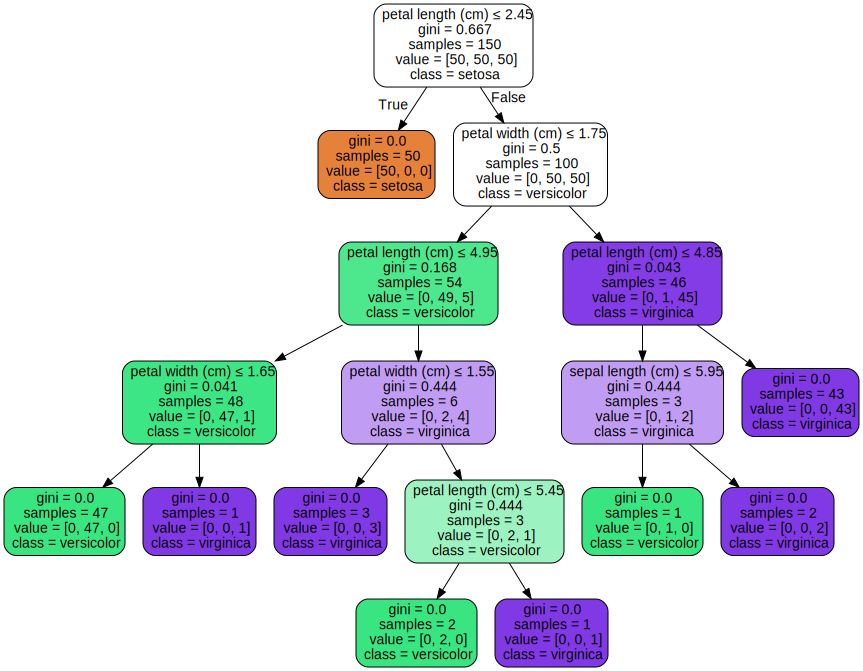

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Export the tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize in Colab using graphviz
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format="png")  # Saves to file
graph  # Displays in Colab

**Q21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its**
**accuracy with a fully grown tree.**

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Decision Tree with max depth of 3 (pruned)
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)
y_pred_pruned = pruned_tree.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

# Step 4: Train fully grown Decision Tree
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)
y_pred_full = full_tree.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Step 5: Print the comparison
print(f"Pruned Tree Accuracy (max_depth=3): {accuracy_pruned:.2f}")
print(f"Full Tree Accuracy (no max depth): {accuracy_full:.2f}")

Pruned Tree Accuracy (max_depth=3): 1.00
Full Tree Accuracy (no max depth): 1.00


**Q22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its**
**accuracy with a default tree.**

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Decision Tree with min_samples_split=5
tree_split_5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
tree_split_5.fit(X_train, y_train)
y_pred_split_5 = tree_split_5.predict(X_test)
accuracy_split_5 = accuracy_score(y_test, y_pred_split_5)

# Step 4: Train default Decision Tree
default_tree = DecisionTreeClassifier(random_state=42)
default_tree.fit(X_train, y_train)
y_pred_default = default_tree.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# Step 5: Print the comparison
print(f"Tree with min_samples_split=5 Accuracy: {accuracy_split_5:.2f}")
print(f"Default Tree Accuracy: {accuracy_default:.2f}")

Tree with min_samples_split=5 Accuracy: 1.00
Default Tree Accuracy: 1.00


**Q23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its**
**accuracy with unscaled data.**

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train a Decision Tree WITHOUT scaling
clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Step 4: Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train a Decision Tree WITH scaled data
clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Step 6: Compare results
print(f"Accuracy WITHOUT Scaling: {accuracy_unscaled:.2f}")
print(f"Accuracy WITH Scaling   : {accuracy_scaled:.2f}")

Accuracy WITHOUT Scaling: 1.00
Accuracy WITH Scaling   : 1.00


**Q24.Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass**
**classification.**

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Wrap DecisionTreeClassifier with One-vs-Rest strategy
ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_classifier.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = ovr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Classifier with One-vs-Rest Accuracy: {accuracy:.2f}")

Decision Tree Classifier with One-vs-Rest Accuracy: 1.00


**Q25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.**

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Get feature importance scores
importances = clf.feature_importances_

# Step 5: Display feature importances
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance Score": importances
}).sort_values(by="Importance Score", ascending=False)

print("Feature Importance Scores:")
print(importance_df)

Feature Importance Scores:
             Feature  Importance Score
2  petal length (cm)          0.906143
3   petal width (cm)          0.077186
1   sepal width (cm)          0.016670
0  sepal length (cm)          0.000000


**Q26.Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance**
**with an unrestricted tree.**

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Decision Tree Regressor with max_depth=5
regressor_pruned = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_pruned.fit(X_train, y_train)
y_pred_pruned = regressor_pruned.predict(X_test)
mse_pruned = mean_squared_error(y_test, y_pred_pruned)

# Step 4: Train unrestricted Decision Tree Regressor
regressor_full = DecisionTreeRegressor(random_state=42)
regressor_full.fit(X_train, y_train)
y_pred_full = regressor_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

# Step 5: Display the results
print(f"Decision Tree Regressor with max_depth=5 MSE: {mse_pruned:.4f}")
print(f"Unrestricted Decision Tree Regressor MSE  : {mse_full:.4f}")

Decision Tree Regressor with max_depth=5 MSE: 0.5245
Unrestricted Decision Tree Regressor MSE  : 0.4952


**Q27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and**
**visualize its effect on accuracy.**

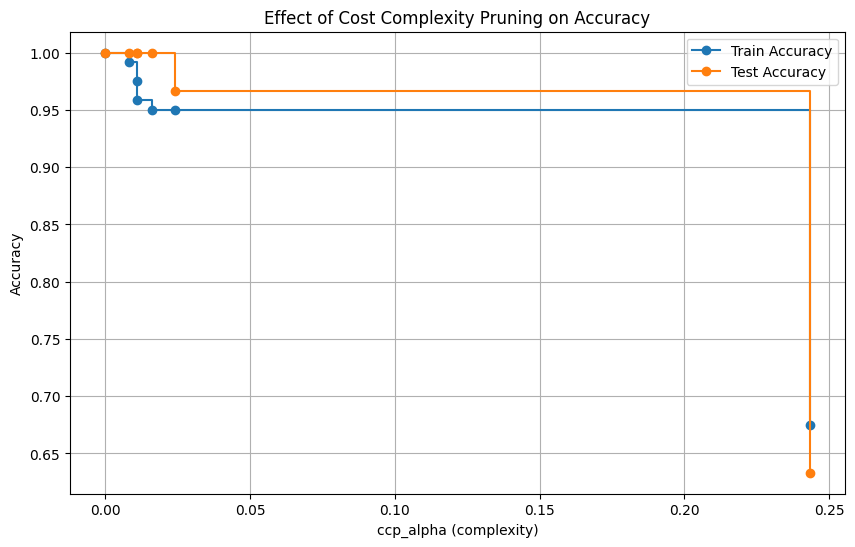

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train initial tree to obtain effective alphas
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Step 4: Train trees for each ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Step 5: Remove last tree if it's trivial
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Step 6: Compute train and test accuracy
train_accuracies = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Step 7: Plot accuracy vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_accuracies, marker='o', label="Test Accuracy", drawstyle="steps-post")
plt.xlabel("ccp_alpha (complexity)")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Q28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,**
**Recall, and F1-Score.**

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = clf.predict(X_test)

# Step 5: Evaluate using classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Q29.Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.**

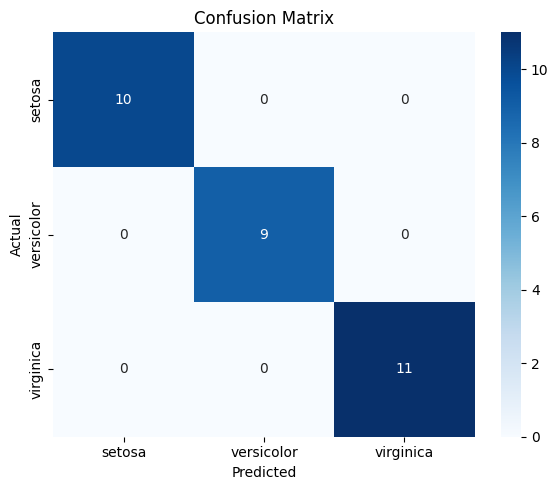

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict
y_pred = clf.predict(X_test)

# Step 5: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 6: Visualize using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

**Q30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values**
**for max_depth and min_samples_split.**

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Set up the parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}

# Step 4: Initialize the Decision Tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Step 5: Fit the model
grid_search.fit(X_train, y_train)

# Step 6: Predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 7: Display results
print("Best Parameters:", grid_search.best_params_)
print(f"Test Set Accuracy: {accuracy:.2f}")

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Test Set Accuracy: 1.00
